In [1]:
!nvidia-smi

Sat Aug 12 12:56:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
100% 6.23M/6.23M [00:00<00:00, 81.6MB/s]

2023-08-12 12:57:04.878232: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-12 12:57:05.817900: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 81.4MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 291.4ms
Speed: 0.7ms pre-process, 291.4ms inference, 517.3ms postprocess per image at shape (1, 3, 640, 640)


## Custom Training

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd /content/drive/MyDrive/Pothole Detection Project New_YOLO8

/content/drive/MyDrive/Pothole Detection Project New_YOLO8


In [9]:
%ls

data.yaml           README.roboflow.txt  test/   valid/
README.dataset.txt  runs/                train/  yolov8s.pt


In [ ]:
%cd /content/drive/MyDrive/Pothole Detection Project New_YOLO8

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=50 imgsz=500 plots=True

/content/drive/MyDrive/Pothole Detection Project New_YOLO8
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=50, patience=50, batch=16, imgsz=500, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int

In [13]:
!ls runs/detect/train/

args.yaml  weights


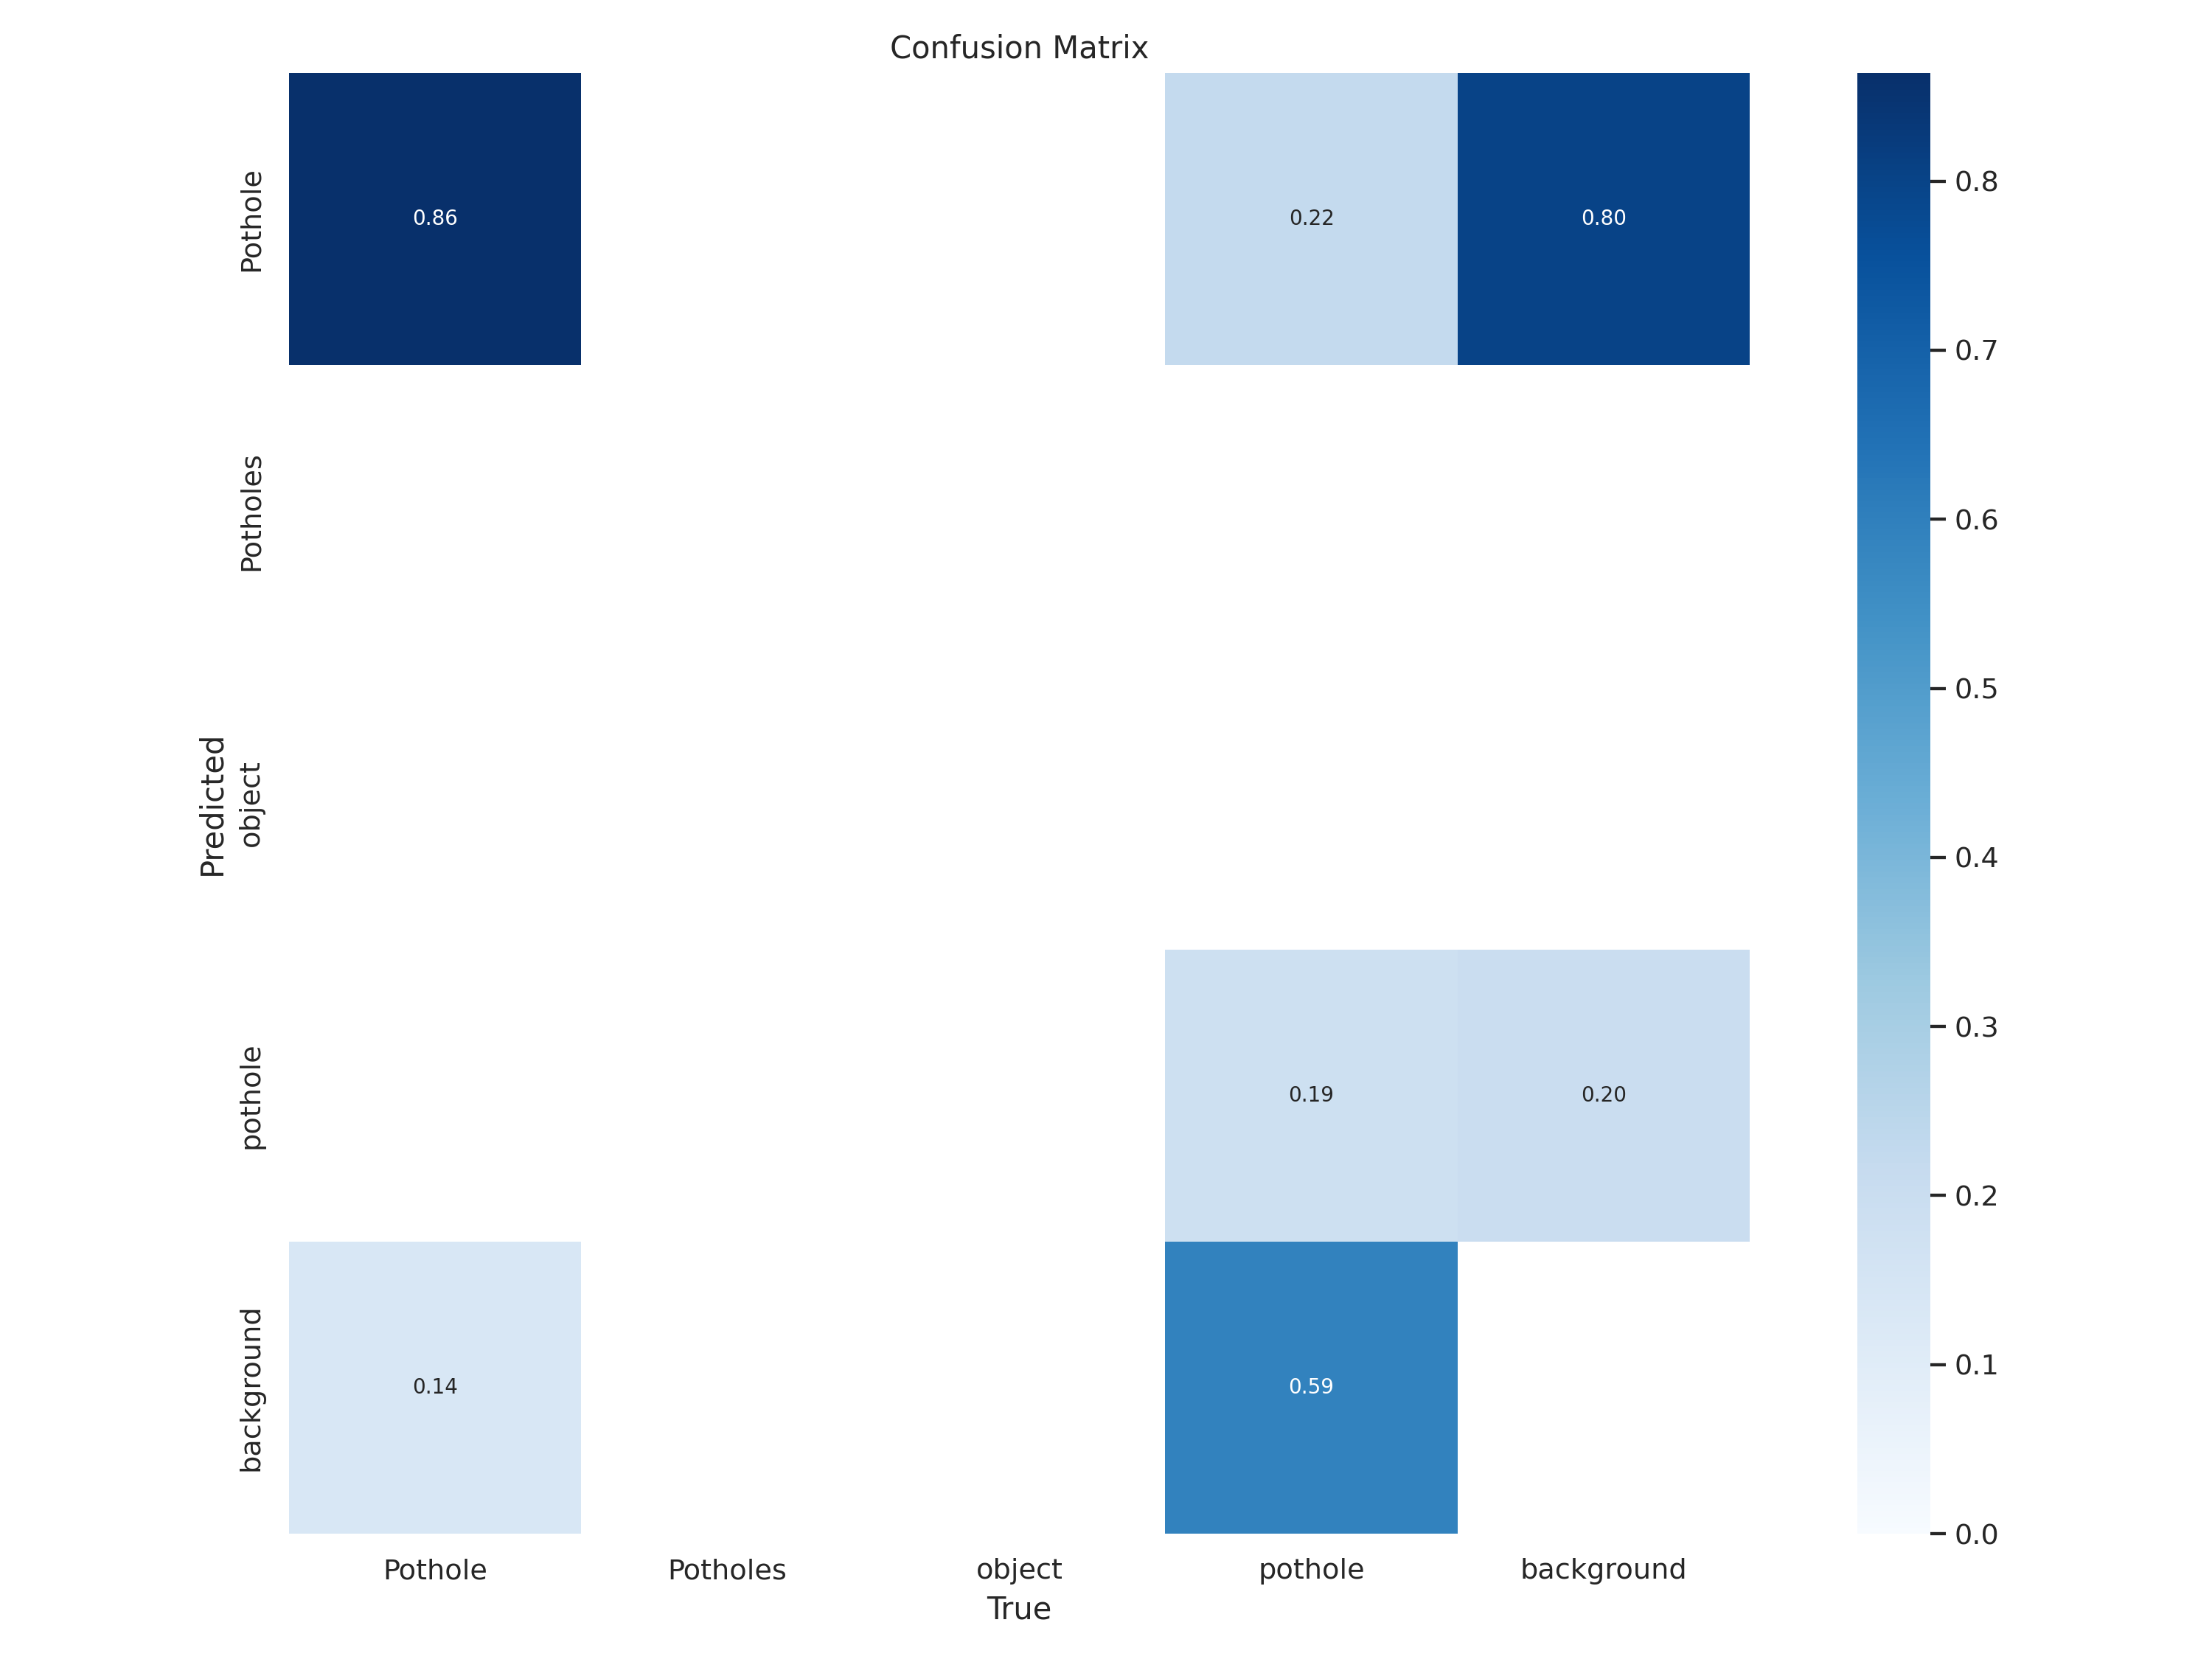

In [15]:
Image(filename='runs/detect/train10/confusion_matrix.png', width=600)

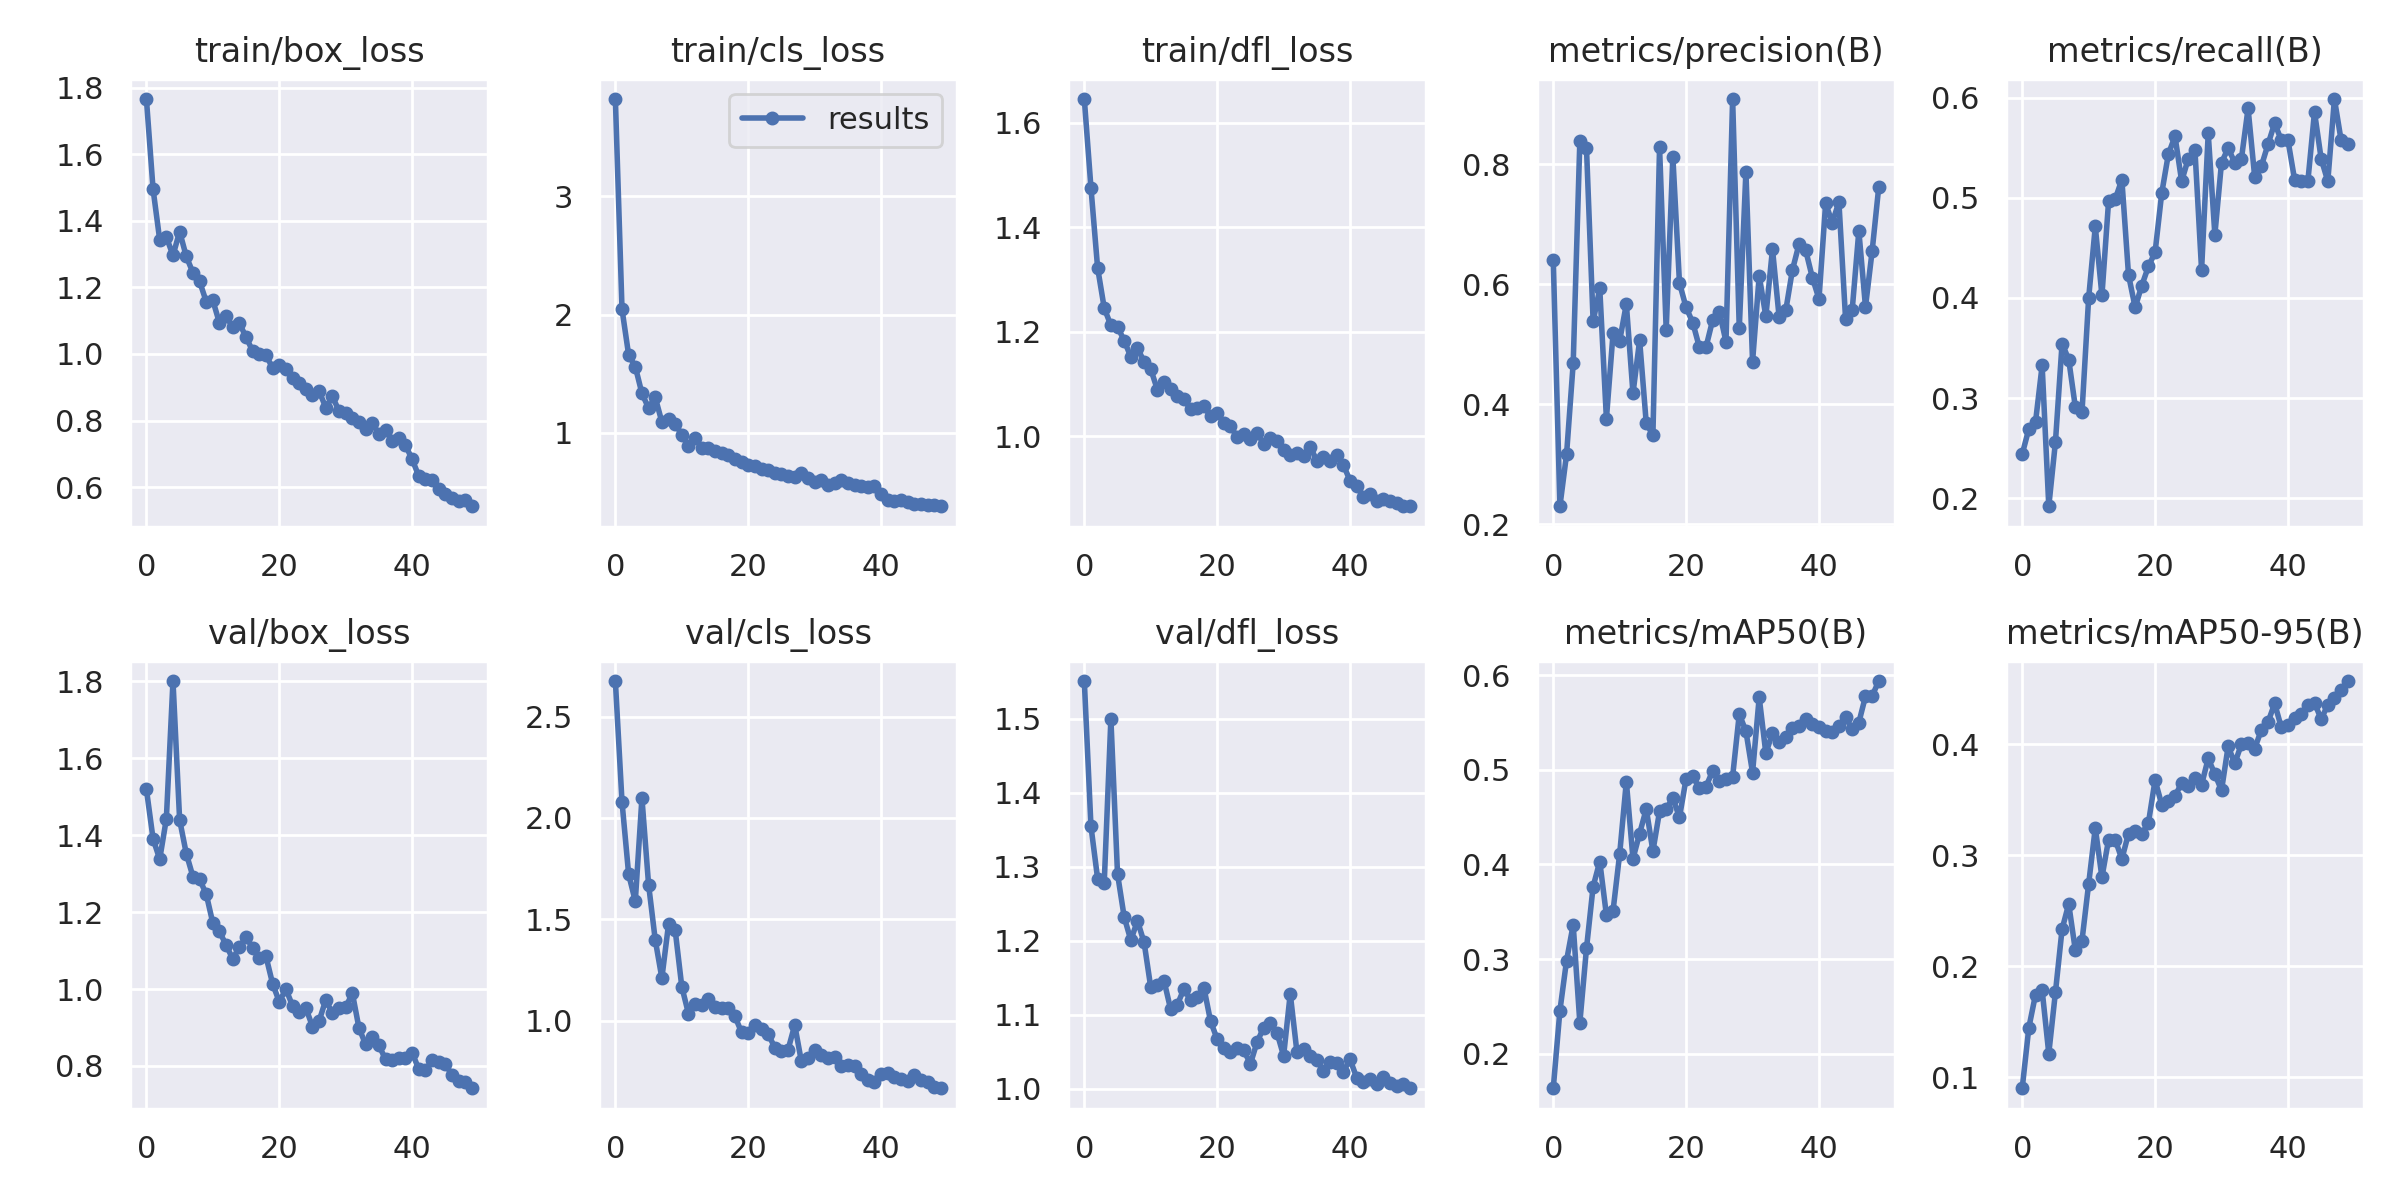

In [16]:
Image(filename='runs/detect/train10/results.png', width=600)

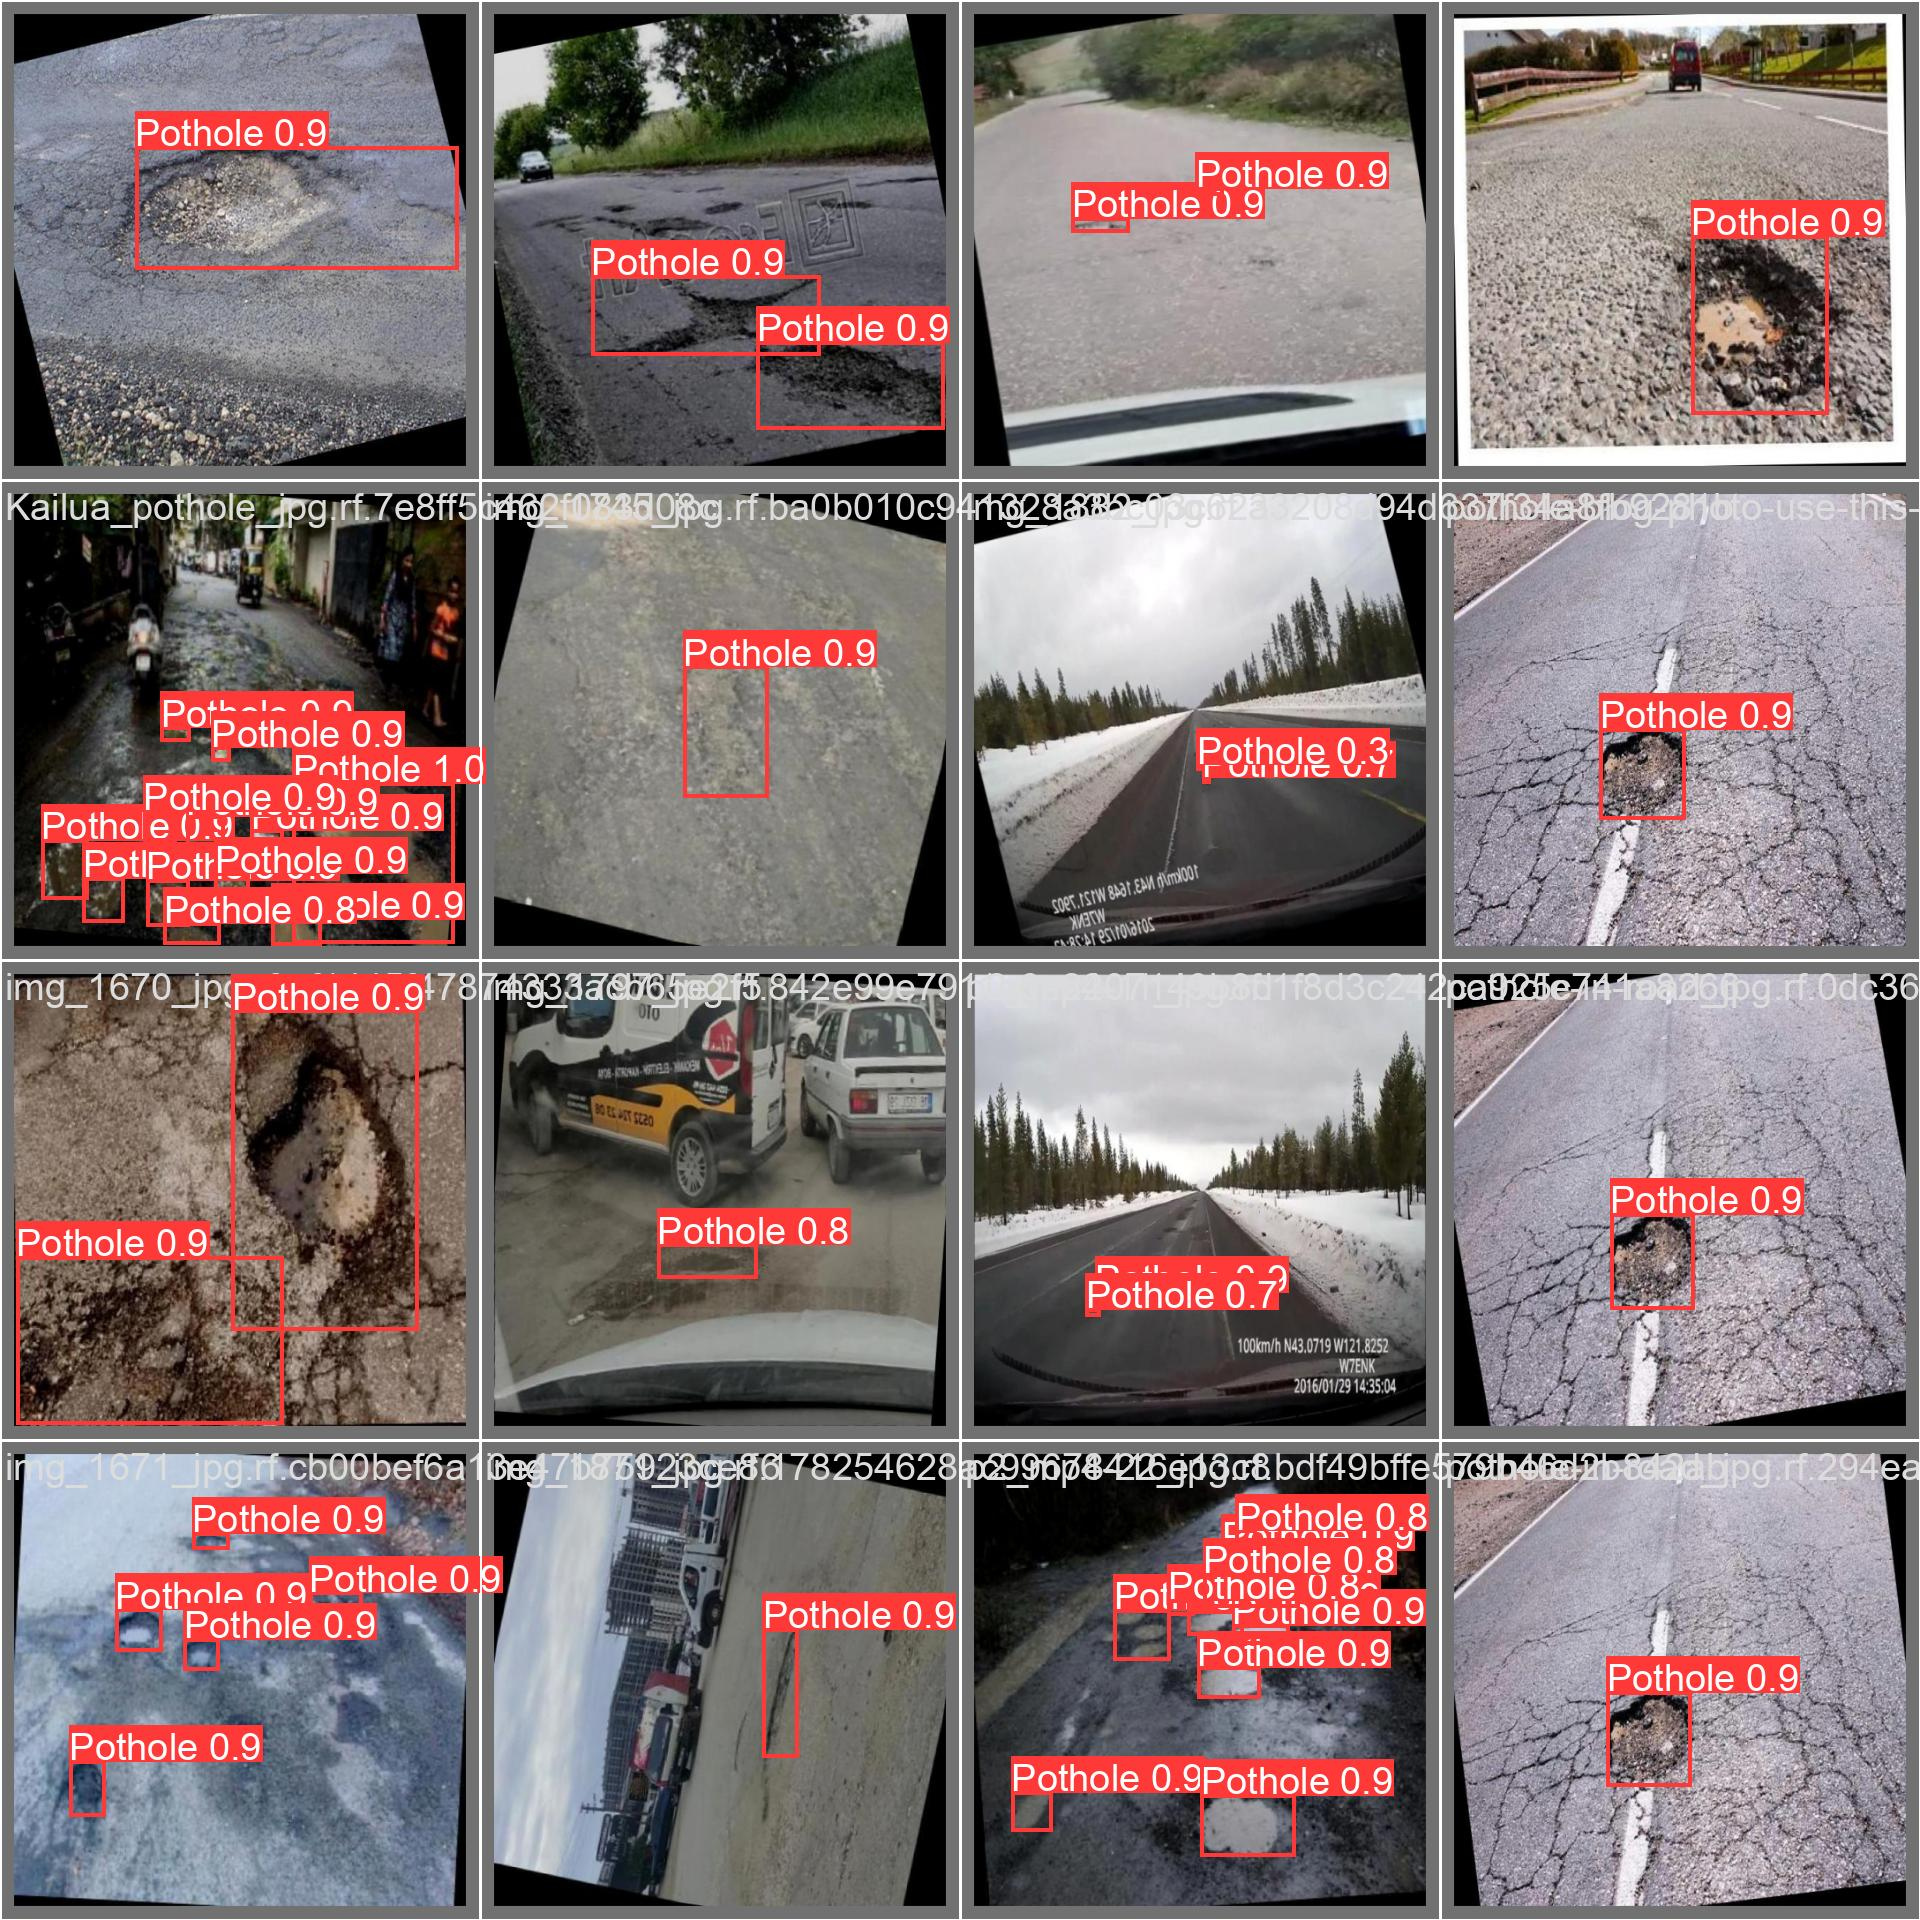

In [17]:
Image(filename='runs/detect/train10/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [18]:
!yolo task=detect mode=val model=runs/detect/train10/weights/best.pt data=data.yaml

2023-08-12 13:35:18.649329: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-12 13:35:19.532886: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Pothole Detection Project New_YOLO8/valid/labels.cache... 52 images, 0 backgrounds, 0 corrupt: 100% 52/52 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:03<00:00,  1.02it/s]
                   all         52        152      0.758       0.55      0.585      0.458
               Pothole 

## Inference with Custom Model

In [25]:
%ls

data.yaml   README.dataset.txt   runs/  train/  yolov8s.pt
Output.mp4  README.roboflow.txt  test/  valid/


In [21]:
!yolo task=detect mode=predict model=runs/detect/train10/weights/best.pt conf=0.25 source=test/images

2023-08-12 13:37:16.122451: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-12 13:37:16.993741: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
image 1/63 /content/drive/MyDrive/Pothole Detection Project New_YOLO8/test/images/The-worst-potholes-in-Metro-Detroit-1-_mp4-10_jpg.rf.f64288ea06b5a0f7b983b2f066e61c47.jpg: 512x512 3 Potholes, 11.2ms
image 2/63 /content/drive/MyDrive/Pothole Detection Project New_YOLO8/test/images/The-worst-potholes-in-Metro-Detroit-1-_mp4-14_jpg.rf.9fef0eaedaea8d694ad11e280cfdd0ed.jpg: 512x512 4 Potholes, 1 p

**NOTE:** Let's take a look at few results.

In [22]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [28]:

%ls

data.yaml   predict.py          README.roboflow.txt  test/   valid/
Output.mp4  README.dataset.txt  runs/                train/  yolov8s.pt


In [ ]:

%cd ultralytics\yolo\v8\detect

In [31]:

!python predict.py model='best.pt' source='Output.mp4'

Traceback (most recent call last):
  File "/content/drive/MyDrive/Pothole Detection Project New_YOLO8/predict.py", line 7, in <module>
    from ultralytics.yolo.utils import DEFAULT_CONFIG, ROOT, ops
ImportError: cannot import name 'DEFAULT_CONFIG' from 'ultralytics.yolo.utils' (/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/utils/__init__.py)


In [30]:
!pip install hydra-core


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144555 sha256=8976b9b239067a0e5f07373a238e7b23c682d5fd29933c3a5ba5dc49325e74cf
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime
